In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Load the Wine dataset

In [46]:
wine_data = load_wine()
X = wine_data.data  # Features
y = wine_data.target  # Target variable

### Convert the data to a DataFrame for better visualization (optional)

In [45]:
feature_names = wine_data.feature_names
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['Target'] = y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Target, Length: 178, dtype: int32

### Standardize the features

In [39]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Apply PCA for dimensionality reduction

In [40]:
pca = PCA(n_components=2)  # You can choose the number of components you want to keep
X_pca = pca.fit_transform(X_std)

print(f"Shape of the dataset before PCA : {wine_df.shape}")
print(f"Shape of the dataset after PCA : {X_pca.shape}")

Shape of the dataset before PCA : (178, 14)
Shape of the dataset after PCA : (178, 2)


### Create a DataFrame to store the PCA results

In [41]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

### Plot the data points in the PCA space

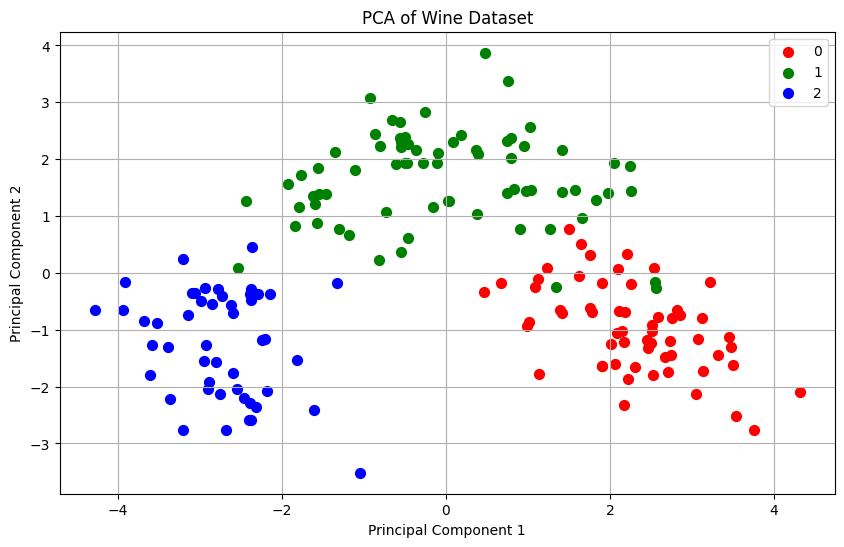

In [42]:
plt.figure(figsize=(10, 6))
targets = wine_df['Target'].unique()
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indices = pca_df['Target'] == target
    plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], c=color, s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend(targets)
plt.grid()
plt.show()